In [23]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from keras.optimizers import Adam
from keras.layers import Dense, Input, Dropout, Flatten, Conv2D, MaxPool2D
from keras.models import load_model, Sequential

In [4]:
train_path = os.path.join(os.getcwd(), 'images/train')
test_path = os.path.join(os.getcwd(), 'images/validation')

## Prepping Data


In [33]:
train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                   height_shift_range = 0.2,
                                   rotation_range = 20,
                                   width_shift_range = 0.2,
                                   horizontal_flip = True)
test_datagen= ImageDataGenerator(rescale = 1/255)

In [34]:
train_generator = train_datagen.flow_from_directory(train_path,
                                                    batch_size = 20,
                                                    class_mode = 'categorical',
                                                    color_mode='grayscale', 
                                                    target_size = (48,48))     
validation_generator =  test_datagen.flow_from_directory( test_path,
                                                          batch_size  = 20,
                                                          class_mode  = 'categorical',
                                                          color_mode='grayscale', 
                                                          target_size = (48, 48))

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


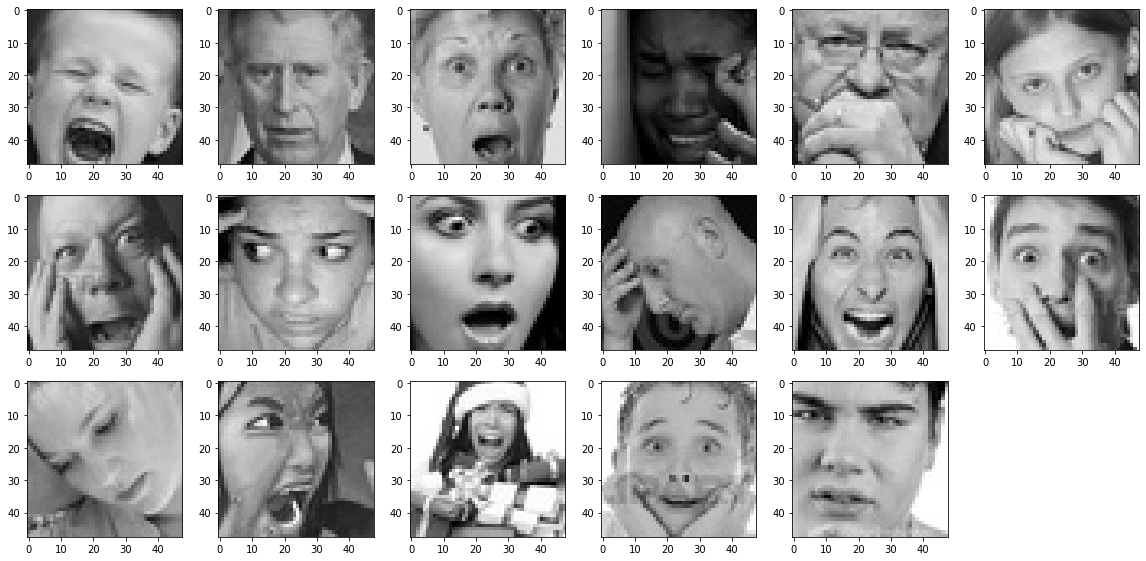

In [43]:
pic_size=48
folder_path=os.path.join(os.getcwd(), 'images/')
expression='fear'

plt.figure(figsize=(20,20))
for i in range(1,18,1):
    plt.subplot(6,6,i)
    img=load_img(folder_path+'train/'+expression+"/"+
                os.listdir(folder_path + 'train/' + expression)[i],target_size=(pic_size,pic_size))
    plt.imshow(img)
plt.show()

## CNN Creation

In [28]:
model = Sequential()

model.add(Conv2D(8,activation ='relu',kernel_size = (5,5), input_shape = (48,48,3),padding="same"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(16,kernel_size = (4,4),activation ='relu',padding="same"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(7, activation = "softmax"))

In [29]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 48, 48, 8)         608       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 24, 24, 8)         0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 24, 24, 8)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 16)        2064      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 12, 12, 16)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2304)             

In [30]:
model.compile(optimizer=Adam(lr=0.001), metrics=['accuracy'], loss='categorical_crossentropy')


In [31]:
checkpoint = ModelCheckpoint("model_weights.h5",
                             monitor='val_acc', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='max')

## Model FIt

In [32]:
epochs_size = 15
history = model.fit_generator(train_generator,                                
                                epochs=epochs_size,
                                validation_data = validation_generator,
                                callbacks=[checkpoint]
                                )

Epoch 1/15
1442/1442 [==============================] - 112s 77ms/step - loss: 1.8124 - accuracy: 0.2446 - val_loss: 1.8202 - val_accuracy: 0.2622
Epoch 2/15
   3/1442 [..............................] - ETA: 1:01 - loss: 1.7356 - accuracy: 0.2500

/Users/dianaomomehin/opt/anaconda3/envs/ml_hw4/lib/python3.7/site-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


1442/1442 [==============================] - 113s 78ms/step - loss: 1.7803 - accuracy: 0.2585 - val_loss: 1.8720 - val_accuracy: 0.2884
Epoch 3/15
1442/1442 [==============================] - 122s 84ms/step - loss: 1.7682 - accuracy: 0.2675 - val_loss: 1.5209 - val_accuracy: 0.2870
Epoch 4/15
1442/1442 [==============================] - 120s 83ms/step - loss: 1.7637 - accuracy: 0.2687 - val_loss: 1.3988 - val_accuracy: 0.2947
Epoch 5/15
1442/1442 [==============================] - 112s 77ms/step - loss: 1.7576 - accuracy: 0.2719 - val_loss: 1.7726 - val_accuracy: 0.2978
Epoch 6/15
1442/1442 [==============================] - 108s 75ms/step - loss: 1.7545 - accuracy: 0.2772 - val_loss: 1.8859 - val_accuracy: 0.3070
Epoch 7/15
1442/1442 [==============================] - 113s 78ms/step - loss: 1.7486 - accuracy: 0.2800 - val_loss: 1.7613 - val_accuracy: 0.3085
Epoch 8/15
1442/1442 [==============================] - 113s 78ms/step - loss: 1.7459 - accuracy: 0.2836 - val_loss: 1.5340 - val

## Plots

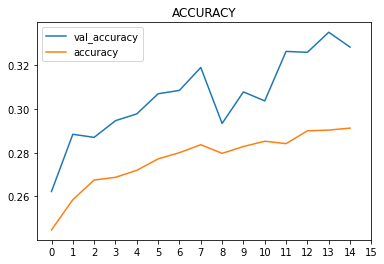

In [35]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs = range(len(accuracy))

plt.plot(epochs, val_accuracy, label="val_accuracy")
plt.plot(epochs, accuracy, label="accuracy")
plt.title("Accuracy")
plt.xticks(range(0,16))
plt.legend();

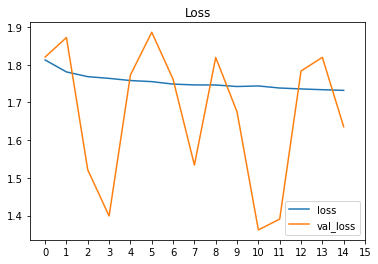

In [38]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(len(accuracy))


plt.plot(epochs, loss, label="loss")
plt.plot(epochs, val_loss, label="val_loss")
plt.title("Loss")
plt.xticks(range(0,16))
plt.legend();

In [39]:
import os
for i in os.listdir(test_path):
    print(i,len(os.listdir(os.path.join(test_path,i))))

happy 1825
sad 1139
fear 1018
surprise 797
neutral 1216
angry 960
disgust 111


happy 7164
sad 4938
fear 4103
surprise 3205
neutral 4982
angry 3993
disgust 436


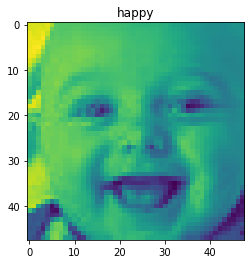

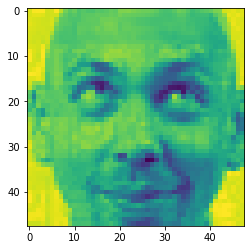

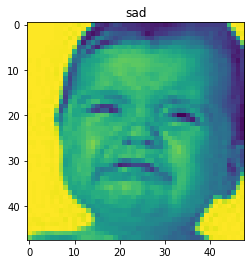

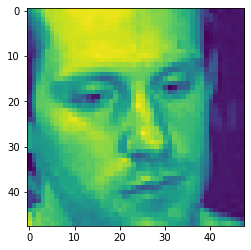

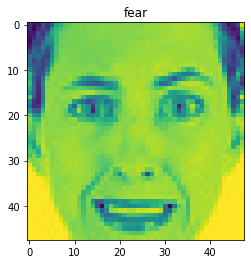

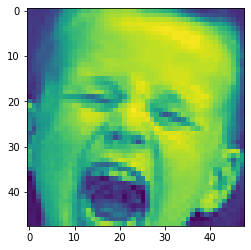

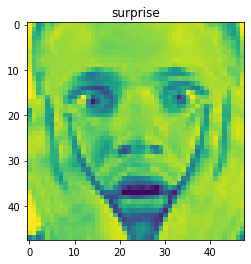

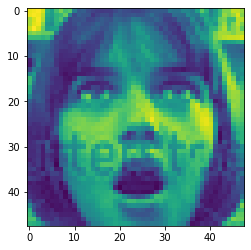

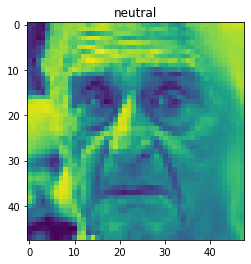

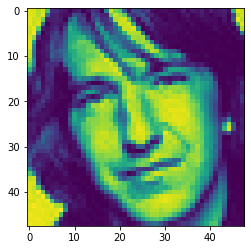

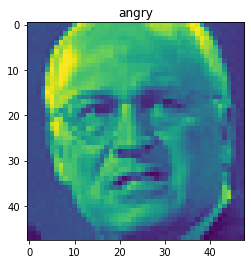

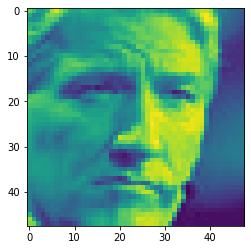

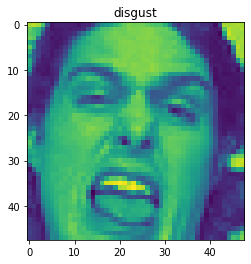

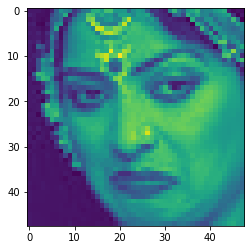

In [41]:
params=[]
for i in os.listdir(train_path):
    params.append(i)
    print(i,len(os.listdir(os.path.join(train_path,i))))

for m in params:
    k=0
    plt.title(m)
    pat=os.path.join(train_path,m)
    for img in os.listdir(pat):
        img_path=os.path.join(pat,img)
        if k<2:
            img_array=mpimg.imread(img_path)
            plt.imshow(img_array)
            plt.show()
            k=k+1
        else:
            break